In [289]:
# Part-1 (Defining the problem)
'''
Aim: Predicting the price of a house based on the given data

Target: Price
Feature: Other than price(By feature selection)
'''

'\nAim: Predicting the price of a house based on the given data\n\nTarget: Price\nFeature: Other than price(By feature selection)\n'

In [290]:
# Part-2 (importing libraries)
import pandas as pd

# Importing a dataset of csv type
df = pd.read_csv("C:\\Users\\satya\\Desktop\\Jupitar\\Projects\\Housing Price Prediction\\Housing.csv")

import warnings

warnings.filterwarnings('ignore')

In [291]:
# Part-3 (Data cleaning)

# Checking 5 rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [292]:
# Checking shape
print("Shape: ",df.shape)

Shape:  (545, 13)


In [293]:
# checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [294]:
# Handling data types
df['price'] = pd.to_numeric(df['price'],errors='coerce').fillna(0).astype('float64')
df['area']=pd.to_numeric(df['area'],errors='coerce').fillna(0).astype('int64')
df['bedrooms']=pd.to_numeric(df['bedrooms'],errors='coerce').fillna(0).astype('int64')
df['bathrooms']=pd.to_numeric(df['bathrooms'],errors = 'coerce').fillna(0).astype('int64')
df['stories']=pd.to_numeric(df['stories'],errors='coerce').fillna(0).astype('int64')
df['parking']=pd.to_numeric(df['parking'],errors='coerce').fillna(0).astype('int64')

'''
Only-if, there are any nan, and Null value is present, they get overwritten by value '0'
'''

"\nOnly-if, there are any nan, and Null value is present, they get overwritten by value '0'\n"

In [295]:
# Checking statistical summary
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


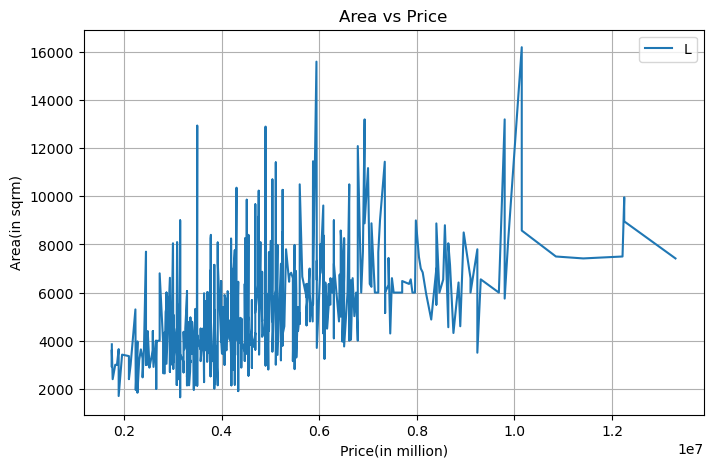

In [296]:
# Checking graph before handling null and duplicate values
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df['price'], df['area'])
plt.title('Area vs Price')
plt.legend('Line')
plt.xlabel('Price(in million)')
plt.ylabel('Area(in sqrm)')
plt.grid(True)
plt.show()

In [297]:
# Checking null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [298]:
# checking duplicates
df.duplicated().sum()

# if there 
df.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150.0,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000.0,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000.0,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [299]:
numerical_features = ['price','area','bedrooms','bathrooms','stories','parking']
categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

print("First 5 rows of numerical_feature: \n",df.loc[0:5,numerical_features])
print()
print("First 5 rows of categorical_feature: \n",df.loc[0:5,categorical_features])

First 5 rows of numerical_feature: 
         price  area  bedrooms  bathrooms  stories  parking
0  13300000.0  7420         4          2        3        2
1  12250000.0  8960         4          4        4        3
2  12250000.0  9960         3          2        2        2
3  12215000.0  7500         4          2        2        3
4  11410000.0  7420         4          1        2        2
5  10850000.0  7500         3          3        1        2

First 5 rows of categorical_feature: 
   mainroad guestroom basement hotwaterheating airconditioning prefarea  \
0      yes        no       no              no             yes      yes   
1      yes        no       no              no             yes       no   
2      yes        no      yes              no              no      yes   
3      yes        no      yes              no             yes      yes   
4      yes       yes      yes              no             yes       no   
5      yes        no      yes              no             yes     

In [300]:
# Handling outliers (method-1)
def Inter_Quartile_Range(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3-Q1
    
    upper_bound = Q1-1.5*IQR
    lower_bound = Q3-1.5*IQR
    
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    print("LB: ",lower_bound)
    print("UB: ",upper_bound)
    return outliers

for col in numerical_features:
    outliers = Inter_Quartile_Range(df[col])
    print("Outlier in column'{}': ".format(col))
    print(outliers)

LB:  2275000.0
UB:  -35000.0
Outlier in column'price': 
0      13300000.0
1      12250000.0
2      12250000.0
3      12215000.0
4      11410000.0
          ...    
540     1820000.0
541     1767150.0
542     1750000.0
543     1750000.0
544     1750000.0
Name: price, Length: 545, dtype: float64
LB:  2220.0
UB:  -540.0
Outlier in column'area': 
0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64
LB:  1.5
UB:  0.5
Outlier in column'bedrooms': 
0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64
LB:  0.5
UB:  -0.5
Outlier in column'bathrooms': 
0      2
1      4
2      2
3      2
4      1
      ..
540    1
541    1
542    1
543    1
544    1
Name: bathrooms, Length: 545, dtype: int64
LB:  0.5
UB:  -0.5
Outlier in column'stories': 
0      3
1      4
2      2
3      2
4      2
      ..
54

In [301]:
# Handling outliers (method-2)
from sklearn.ensemble import IsolationForest as IF
import numpy as np

def isolation_forest_outliers(col):
    # Ensure the column is in a numpy array and reshaped correctly
    col_array = np.array(col).reshape(-1, 1)
    iso_forest = IF(contamination='auto')
    predictions = iso_forest.fit_predict(col_array)
    outliers = col[predictions == -1]
    return outliers

for col in numerical_features:
    outliers = isolation_forest_outliers(df[col])
    print("Outliers in column '{}':".format(col))
    print(outliers)

Outliers in column 'price':
0      13300000.0
1      12250000.0
2      12250000.0
3      12215000.0
4      11410000.0
          ...    
540     1820000.0
541     1767150.0
542     1750000.0
543     1750000.0
544     1750000.0
Name: price, Length: 122, dtype: float64
Outliers in column 'area':
1       8960
2       9960
6       8580
7      16200
8       8100
       ...  
527     1836
530     1950
533     2400
537     1700
541     2400
Name: area, Length: 110, dtype: int64
Outliers in column 'bedrooms':
0      4
1      4
3      4
4      4
6      4
      ..
488    4
523    4
528    1
534    4
536    5
Name: bedrooms, Length: 109, dtype: int64
Outliers in column 'bathrooms':
0      2
1      4
2      2
3      2
5      3
      ..
413    2
446    2
499    3
509    2
523    2
Name: bathrooms, Length: 144, dtype: int64
Outliers in column 'stories':
0      3
1      4
6      4
9      4
17     4
      ..
378    3
407    3
411    3
419    3
488    3
Name: stories, Length: 80, dtype: int64
Outliers i

In [302]:
# Removing Outliers
def Inter_Quartile_Range(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print("Lower Bound: ", lower_bound)
    print("Upper Bound: ", upper_bound)
    
    clean_col = col[~((col < lower_bound) | (col > upper_bound))]
    return clean_col

# Copy the dataframe to preserve the original
clean_df = df.copy() 
# # Removing null values
# for col in enumerate(col):
#     clean_df[col] = clean_df[col].fillna(clean_df[col].mean())
# # removing duplicates
# clean_df_no_duplicates = clean_df.drop_duplicates()

for col in numerical_features:
    clean_df[col] = Inter_Quartile_Range(df[col])
    print("Removed outliers in column '{}':".format(col))
    print(clean_df[col])

Lower Bound:  -35000.0
Upper Bound:  9205000.0
Removed outliers in column 'price':
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 545, dtype: float64
Lower Bound:  -540.0
Upper Bound:  10500.0
Removed outliers in column 'area':
0      7420.0
1      8960.0
2      9960.0
3      7500.0
4      7420.0
        ...  
540    3000.0
541    2400.0
542    3620.0
543    2910.0
544    3850.0
Name: area, Length: 545, dtype: float64
Lower Bound:  0.5
Upper Bound:  4.5
Removed outliers in column 'bedrooms':
0      4.0
1      4.0
2      3.0
3      4.0
4      4.0
      ... 
540    2.0
541    3.0
542    2.0
543    3.0
544    3.0
Name: bedrooms, Length: 545, dtype: float64
Lower Bound:  -0.5
Upper Bound:  3.5
Removed outliers in column 'bathrooms':
0      2.0
1      NaN
2      2.0
3      2.0
4      1.0
      ... 
540    1.0
541    1.0
542    1.0
5

In [303]:
# Part-4 (Data preprocessing)

In [304]:
'''
The values in the dataset which are abnormally high or low compared to other 
values are considered as outliers.
They can be handled in several ways, most commonly used is IQR method.
IQR stands for Inter Quartile Range. 
Another way of handling outliers is Isolation Forest method
'''

'\nThe values in the dataset which are abnormally high or low compared to other \nvalues are considered as outliers.\nThey can be handled in several ways, most commonly used is IQR method.\nIQR stands for Inter Quartile Range. \nAnother way of handling outliers is Isolation Forest method\n'

In [305]:
'''
Methods for categorical encoding:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
'''

'\nMethods for categorical encoding:\n\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.preprocessing import OneHotEncoder\n'

In [306]:
# Encoding Categorical Features using lable_encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_features:
    clean_df[col]=le.fit_transform(clean_df[col])

In [307]:
# # Encoding Categorical Feature using one-hot encoding
# from sklearn.preprocessing import OneHotEncoder
# oh = OneHotEncoder(drop='first',sparse=False)

# for col in categorical_features:
#     df[col]=oh.fit_transform(df[col])

In [308]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

df_std = pd.DataFrame(ss.fit_transform(clean_df),columns = clean_df.columns)

print("Glimps of standardized dataset: \n",df_std.head())

Glimps of standardized dataset: 
    price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0    NaN  1.316021  1.632469   1.470476  2.202437  0.405623  -0.465315   
1    NaN  2.146871  1.632469        NaN       NaN  0.405623  -0.465315   
2    NaN  2.686383  0.127095   1.470476  0.598350  0.405623  -0.465315   
3    NaN  1.359182  1.632469   1.470476  0.598350  0.405623  -0.465315   
4    NaN  1.316021  1.632469  -0.575404  0.598350  0.405623   2.149083   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0 -0.734539        -0.219265         1.472618  1.704355  1.804941   
1 -0.734539        -0.219265         1.472618       NaN -0.554035   
2  1.361397        -0.219265        -0.679063  1.704355  1.804941   
3  1.361397        -0.219265         1.472618       NaN  1.804941   
4  1.361397        -0.219265         1.472618  1.704355 -0.554035   

   furnishingstatus  
0         -1.406286  
1         -1.406286  
2         -0.091662  
3         -1.40628

In [309]:
# Part-5 (Feature Engineering)
# importing visualizing tools
import matplotlib.pyplot as plt
import seaborn as sb

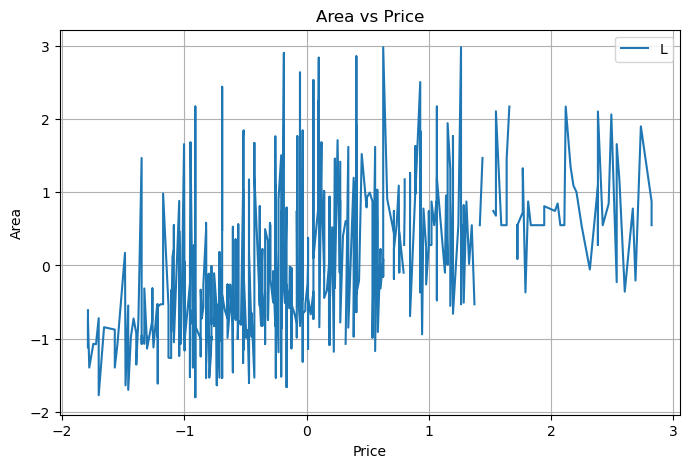

In [310]:
# Normal Plot
plt.figure(figsize=(8,5))
plt.plot(df_std['price'],df_std['area'])
plt.title('Area vs Price')
plt.legend('Line')
plt.xlabel('Price')
plt.ylabel('Area')
plt.grid(True)
plt.show()

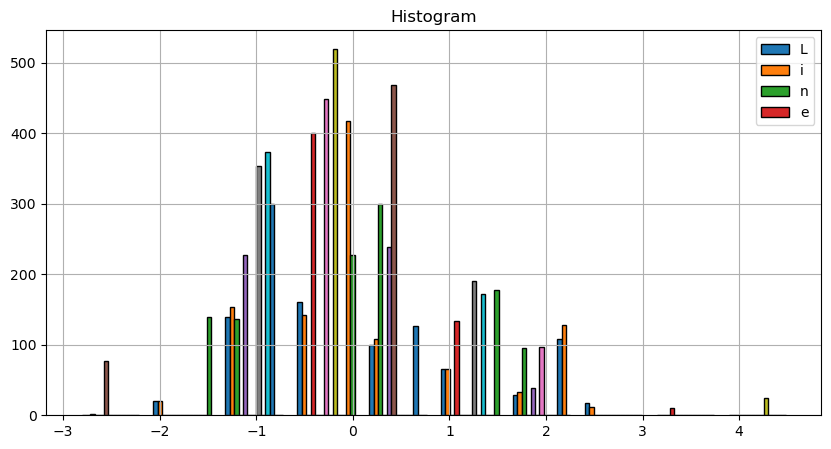

In [311]:
# Histogram

plt.figure(figsize=(10,5))
plt.hist(df_std, bins=10, edgecolor='black')
plt.title('Histogram')
plt.legend('Line')

plt.grid(True)
plt.show()

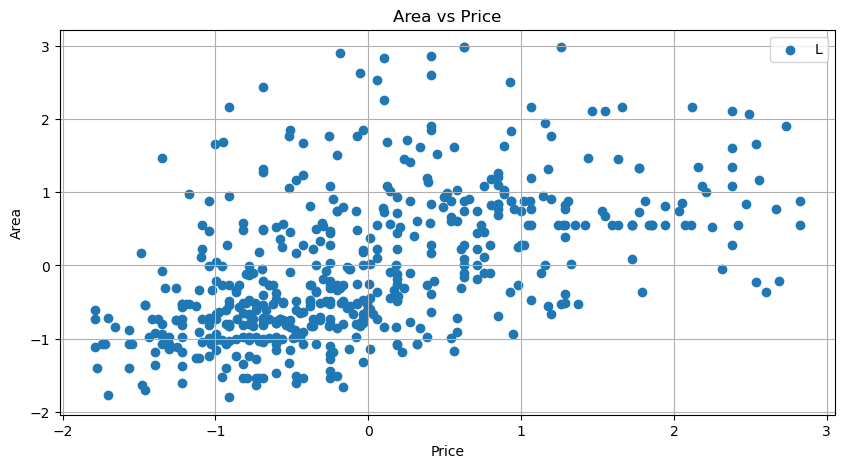

In [312]:
# Scatter plot
plt.figure(figsize=(10,5))
plt.scatter(df_std['price'],df_std['area'])
plt.title('Area vs Price')
plt.legend('Line')
plt.xlabel('Price')
plt.ylabel('Area')
plt.grid(True)
plt.show()

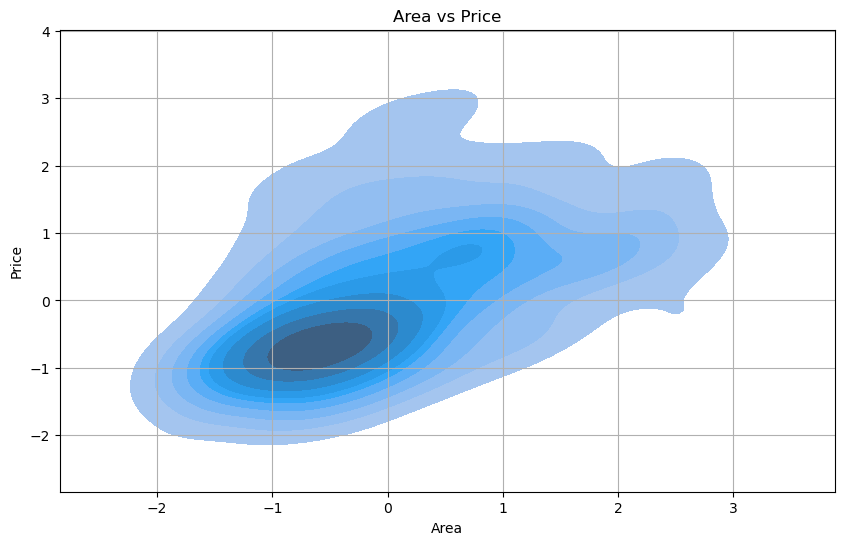

In [313]:
# kdeplot
plt.figure(figsize=(10,6))
sb.kdeplot(df_std, x='price', y='area', fill=True)#bar plot
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [314]:
# Correlational matrix:
correlational_matrix = df_std.corr()
print("Correlational matrix: ")
print(correlational_matrix)

Correlational matrix: 
                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.532442  0.350919   0.457962  0.227512  0.310712   
area              0.532442  1.000000  0.171488   0.211642 -0.081431  0.304678   
bedrooms          0.350919  0.171488  1.000000   0.359205  0.468613  0.023304   
bathrooms         0.457962  0.211642  0.359205   1.000000  0.197959  0.039447   
stories           0.227512 -0.081431  0.468613   0.197959  1.000000  0.055536   
mainroad          0.310712  0.304678  0.023304   0.039447  0.055536  1.000000   
guestroom         0.290195  0.195351  0.096090   0.134789 -0.007789  0.092337   
basement          0.195705  0.051724  0.092667   0.112523 -0.078139  0.044002   
hotwaterheating   0.082829 -0.030535  0.013091   0.071282  0.092721 -0.011781   
airconditioning   0.462342  0.274750  0.195851   0.177458  0.119992  0.105423   
parking           0.358030  0.343114  0.151729   0.171889 -0.049505  0.196913   
prefa

Text(0.5, 1.0, 'Correlational matrix')

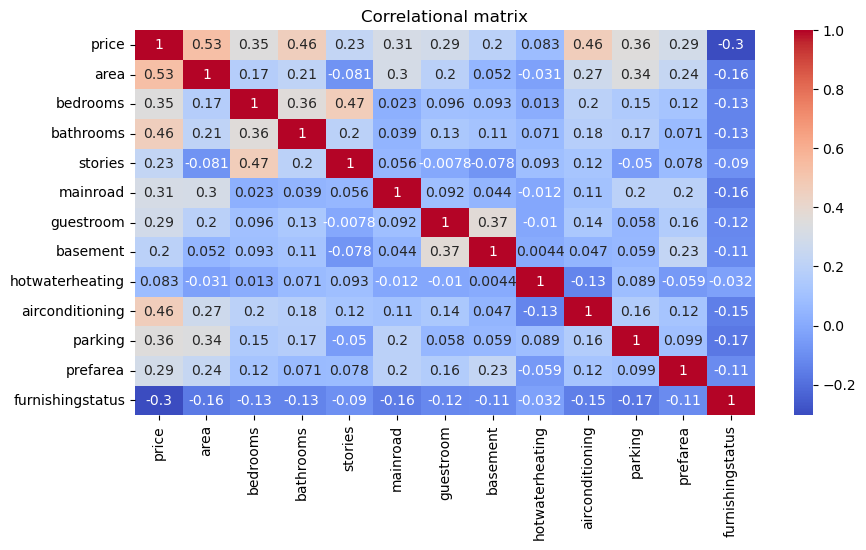

In [315]:
# Generating a heatmap
plt.figure(figsize=(10,5))
sb.heatmap(correlational_matrix,annot=True,cmap='coolwarm')
'''
 annot=True: Annotes each cell wiht there respective integer value
 cmap='coolwarm': is feature kinda thing used to display different colours 
 for each cell. ex: blue colour if cell has -ve value and red for +ve value
'''
plt.title('Correlational matrix')

In [316]:
# Part-6 (Model Selection and training)

In [317]:
'''
Regression is a statistical technique used to model and analyze the relationships between a dependent variable (often called the
target or response variable) and one or more independent variables (often called predictors, features, or explanatory variables).
The primary goal of regression analysis is to predict the value of the dependent variable based on the values of the independent
variables and to understand the underlying relationships between them.
'''

'\nRegression is a statistical technique used to model and analyze the relationships between a dependent variable (often called the\ntarget or response variable) and one or more independent variables (often called predictors, features, or explanatory variables).\nThe primary goal of regression analysis is to predict the value of the dependent variable based on the values of the independent\nvariables and to understand the underlying relationships between them.\n'

In [318]:
# Defining the target and feature
feature = df_std.drop('price',axis=1)
feature = feature.fillna(feature.mean())
target = df_std['price']
target = target.fillna(target.mean())

In [319]:
'''
Feature selection is a crucial step in the machine learning pipeline, as it helps in improving the model's performance by 
selecting the most important features and reducing the dimensionality of the dataset. Several libraries and methods in Python 
can be used for feature selection, each suited for different types of tasks and datasets
'''

"\nFeature selection is a crucial step in the machine learning pipeline, as it helps in improving the model's performance by \nselecting the most important features and reducing the dimensionality of the dataset. Several libraries and methods in Python \ncan be used for feature selection, each suited for different types of tasks and datasets\n"

In [320]:
# Feature_Selecting
from sklearn.feature_selection import SelectKBest,RFE,f_regression
from sklearn.linear_model import LogisticRegression, LinearRegression

model_1 = LogisticRegression()
model_2 = LinearRegression()
skb = SelectKBest(score_func=f_regression,k=6)
rfe = RFE(model_2,n_features_to_select=6)

feature_skb = skb.fit_transform(feature,target)
feature_rfe = rfe.fit_transform(feature,target)

In [321]:
print("Features selected by SelectKBest:",feature.columns[skb.get_support()])

Features selected by SelectKBest: Index(['area', 'bedrooms', 'bathrooms', 'mainroad', 'airconditioning',
       'parking'],
      dtype='object')


In [322]:
print("Features selected by RFE:",feature.columns[rfe.get_support()])

Features selected by RFE: Index(['area', 'bathrooms', 'stories', 'guestroom', 'airconditioning',
       'parking'],
      dtype='object')


In [323]:
feature_own =df_std[['area','bedrooms','bathrooms','mainroad','hotwaterheating','airconditioning']]
print("Features selected by MEE...: ",feature_own.columns)

for col in feature_own:
    feature_own[col] = feature_own[col].fillna(feature_own[col].mean())

Features selected by MEE...:  Index(['area', 'bedrooms', 'bathrooms', 'mainroad', 'hotwaterheating',
       'airconditioning'],
      dtype='object')


In [324]:
feature_all = df_std[['price','area','bedrooms','bathrooms','stories','parking','mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']]
print("All feature: \n",feature_all.columns)

for col in feature_all:
    feature_all[col] = feature_all[col].fillna(feature_all[col].mean())

All feature: 
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [325]:
'''
x_train: the subset of feature variable that will be used to train the model
x_test: the subset of feature variable that will be used to train the model's performance
y_train: the subest of target variable that will be used to train the model
y_test: the subset of target variable that will be used to test the model's performance
'''

"\nx_train: the subset of feature variable that will be used to train the model\nx_test: the subset of feature variable that will be used to train the model's performance\ny_train: the subest of target variable that will be used to train the model\ny_test: the subset of target variable that will be used to test the model's performance\n"

In [326]:
# Training the data using RFE
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature_rfe,target,train_size=0.2,random_state=42)

In [327]:
'''
r2_score() is a function that compares the actual values(y_test)
with the predicted values(y_pred_lin)
'''
from sklearn.metrics import r2_score

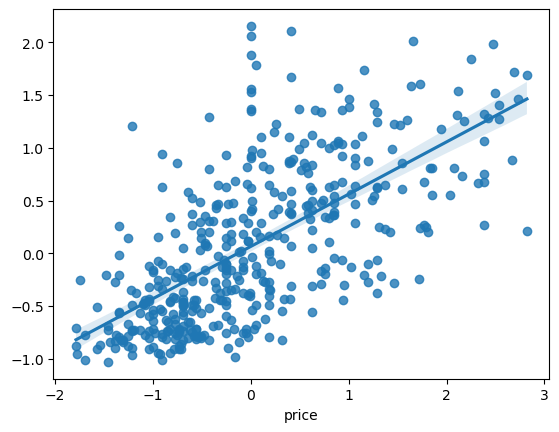

In [328]:
# Training using linear regression
model_2.fit(x_train,y_train)
predic_lr = model_2.predict(x_test)

r2_lin = r2_score(y_test,predic_lr)
# Regplot

sb.regplot(df_std,x=y_test,y=predic_lr)
plt.show()

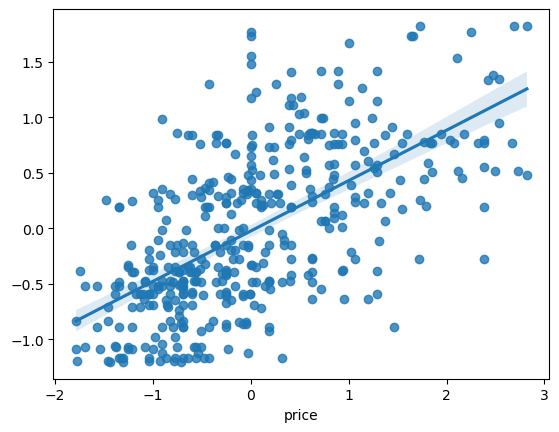

In [329]:
# Traing using KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
predic_kn = kn.predict(x_test)

r2_kn = r2_score(y_test,predic_kn)
sb.regplot(df, x=y_test, y=predic_kn)
plt.show()

In [330]:
# # RandomForestRegression
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# rf.fit(x_train,y_train)
# y_pred_rf = rf.predict(x_test)
# r2_rf = r2_score(y_test,y_pred_rf)
# sb.regplot(data=df,x = y_test,y = y_pred_rf)
# plt.show()

In [331]:
# # LassoRegression
# from sklearn.linear_model import Lasso
# ls = Lasso()
# ls.fit(x_train,y_train)
# y_pred_ls = ls.predict(x_test)
# r2_ls = r2_score(y_test,y_pred_ls)
# sb.regplot(data=df,x = y_test,y = y_pred_ls)
# plt.show()

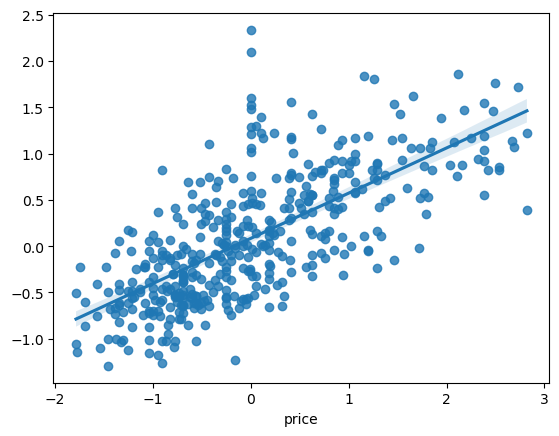

In [332]:
# Training the data using SelectKBest
x_train,x_test,y_train,y_test = train_test_split(feature_skb,target,train_size=0.2,random_state=42)

# Training using linear regression
model_2.fit(x_train,y_train)
predic_lr = model_2.predict(x_test)

r2_lin_2= r2_score(y_test,predic_lr)
# Regplot

sb.regplot(df_std,x=y_test,y=predic_lr)
plt.show()

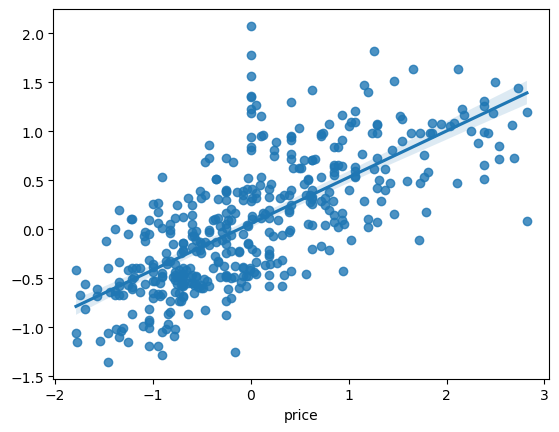

In [333]:
# Training the data using my own feature selection
x_train,x_test,y_train,y_test = train_test_split(feature_own,target,train_size=0.2,random_state=42)

# Training using linear regression
model_2.fit(x_train,y_train)
predic_lr = model_2.predict(x_test)

r2_lin_3 = r2_score(y_test,predic_lr)
# Regplot

sb.regplot(df_std,x=y_test,y=predic_lr)
plt.show()

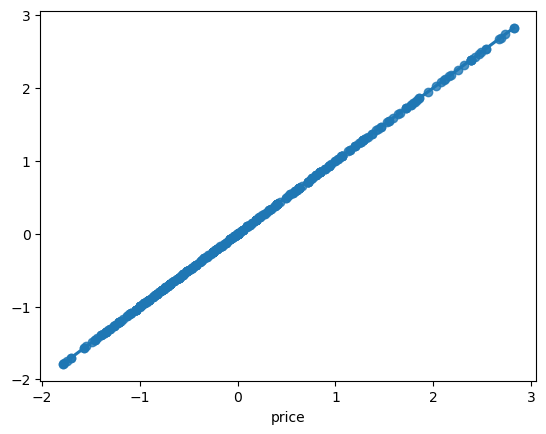

In [334]:
# Training the data using all features
x_train,x_test,y_train,y_test = train_test_split(feature_all,target,train_size=0.2,random_state=42)

# Training using linear regression
model_2.fit(x_train,y_train)
predic_lr = model_2.predict(x_test)

r2_lin_4 = r2_score(y_test,predic_lr)
# Regplot

sb.regplot(df_std,x=y_test,y=predic_lr)
plt.show()

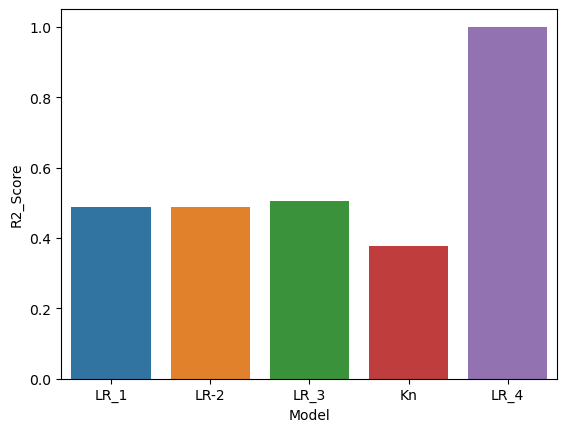

In [335]:
# comparing the accuracy
data = {'Model':['LR_1','LR-2','LR_3','Kn','LR_4'],'R2_Score':[r2_lin_2,r2_lin_2,r2_lin_3,r2_kn,r2_lin_4]}
df = pd.DataFrame(data)
sb.barplot(x='Model',y='R2_Score',data=df)
plt.show()

In [336]:
# Save the model and the scaler
import joblib as jb

jb.dump(lr, 'house_price_model.pkl')
jb.dump(ss,'scaler.pkl')

['scaler.pkl']

In [337]:
# New input data
new_data = {
    'area': 3000,
    'bedrooms': 2,
    'bathrooms': 3,
    'stories': 0,
    'mainroad': 1,
    'guestroom': 1,
    'basement': 1,
    'hotwaterheating': 3,
    'airconditioning': 4,
    'parking': 1,
    'prefarea': 1,
    'furnishingstatus': 5
}
# Convert the new input data to a DataFrame
new_input_df = pd.DataFrame([new_data])

# Normalize the new input data using the same scaler
new_input_scaled = scaler.transform(new_input_df)

# Predict the price
pred_price = lr.predict(new_input_scaled)

In [338]:
print("The predicted price of the house is: ",pred_price)

The predicted price of the house is:  [1008886.40754055]
